In [15]:
import numpy as np
import os
import pandas as pd

traindata_path = "./Data/train.csv"
testdata_path = "./Data/test.csv"

train_data = pd.read_csv(traindata_path, index_col='id')
train_data = pd.DataFrame(train_data)

print(train_data.columns)

test_data = pd.read_csv(testdata_path, index_col='id')
test_data = pd.DataFrame(test_data)



Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16',
       'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')


In [17]:
from sklearn.preprocessing import LabelEncoder

for c in train_data.columns:
    if train_data[c].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(train_data[c].values)+ list(test_data[c].values))
        train_data[c] = lbl.transform(train_data[c].values)
        test_data[c] = lbl.transform(test_data[c].values)



In [19]:
train_data.loc[train_data['cat1'].isna()] = -100

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,


In [5]:
import pandas as pd

traindata_path = "../Data/tabular/train.csv"
testdata_path = "../Data/tabular/test.csv"

train = pd.read_csv(traindata_path)
test = pd.read_csv(testdata_path)

train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [85]:
feature_cols = train.drop(['id', 'target'], axis=1).columns

print(len(feature_cols))
## Getting all the data that are not of "object" type. 
numerical_columns = train[feature_cols].select_dtypes(include=['int64','float64']).columns
categorical_columns = train[feature_cols].select_dtypes(exclude=['int64','float64']).columns

print(len(numerical_columns), len(categorical_columns))
print(numerical_columns)

30
30 0
Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16',
       'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10'],
      dtype='object')


In [8]:
print(train.shape)
train.head()

(300000, 32)


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [9]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250183.425697,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,144320.334812,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,0.000000,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,125399.750000,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,250192.500000,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,375246.250000,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,499999.000000,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


In [40]:
from sklearn.preprocessing import LabelEncoder

for i in train.columns:
    if train[i].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[i].values) + list(test[i].values))
        train[i] = lbl.transform(train[i].values)
        test[i] = lbl.transform(test[i].values)
        

        # lbl.fit(list(train[i]) + list(test[i]))



In [41]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,0,8,0,1,1,33,0,44,54,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,0,8,0,0,4,33,8,48,3,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,0,10,0,0,4,33,0,30,38,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,0,10,0,2,4,33,0,50,3,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,0,8,6,1,4,33,2,32,54,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [44]:
print('Missing value on train : ', sum(train.isnull().sum()))
print('Missing value on test : ', sum(test.isnull().sum()))

Missing value on train :  0
Missing value on test :  0


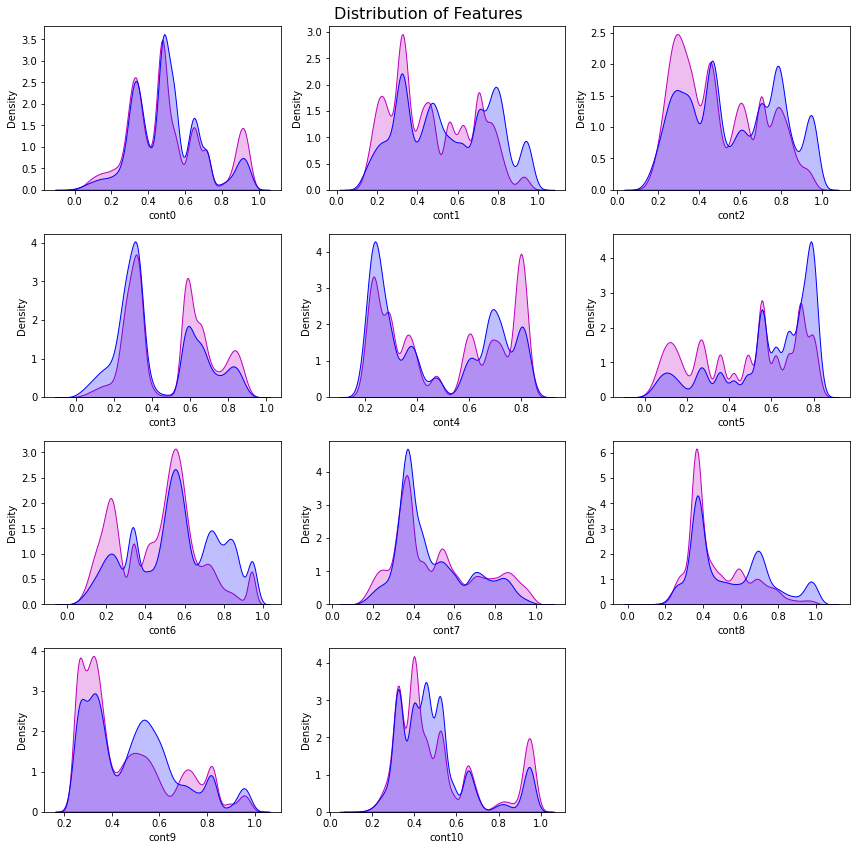

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

rows, cols = 4, 3
f, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12))
f.suptitle('Distribution of Features', fontsize=16)

numerical_columns = train.columns[20:]

for index, col in enumerate(numerical_columns):
    i, j = (index // cols, index % cols)
    sns.kdeplot(train.loc[train['target'] == 0, col], color='m', shade=True, ax= axes[i,j])
    sns.kdeplot(train.loc[train['target'] == 1, col], color='b', shade=True, ax= axes[i,j])

f.delaxes(axes[3, 2])
plt.tight_layout()
plt.show()






In [72]:
corr = df[numerical_columns].corr().abs()

NameError: name 'df' is not defined